In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sentiment_df = pd.read_csv("Sentiment dataset.csv")

In [3]:
sentiment_df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [5]:
sentiment_df.duplicated().sum()

np.int64(0)

In [6]:
for val in sentiment_df.columns:
    print(val,"has",sentiment_df[val].nunique(),'unique values')

Unnamed: 0.1 has 732 unique values
Unnamed: 0 has 732 unique values
Text has 707 unique values
Sentiment has 279 unique values
Timestamp has 683 unique values
User has 685 unique values
Platform has 4 unique values
Hashtags has 697 unique values
Retweets has 26 unique values
Likes has 38 unique values
Country has 115 unique values
Year has 14 unique values
Month has 12 unique values
Day has 31 unique values
Hour has 22 unique values


In [7]:
countries = sentiment_df['Country'].value_counts()
pd.DataFrame(countries)

,count
Country,
USA,59
USA,55
UK,49
Canada,44
Australia,41
...,...
Ireland,1
Scotland,1
Kenya,1


In [8]:
sentiment_df['Platform'].value_counts()

Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

In [9]:
print(sentiment_df['Year'].max())
print(sentiment_df['Year'].min())


2023
2010


So the data ranges from 2010 to 2023

In [10]:
sentiment_df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


- Remove 2 unnamed cols.
- Convert the timestamp to datetime
- No null  and duplicate values
- the text col we need to tokenize for ml to understand
- remove # from hastag col
- remove the m/d/y or timestamp as both serve the same purpose
- remove user col as not important
- has 279 unique sentiments
- twitter duplicate value

## Cleaning and Improvement

In [11]:
sentiment_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Month', 'Day', 'Hour', 'User'], inplace=True)

sentiment_df['Timestamp'] = pd.to_datetime(sentiment_df['Timestamp'])

sentiment_df['Platform'] = sentiment_df['Platform'].str.strip().str.lower()

sentiment_df['Hashtags'] = (sentiment_df['Hashtags']
                                    .str.replace('#', '')
                                    .str.split()
                                    .str.join(','))

In [12]:
sentiment_df.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,twitter,"Nature,Park",15.0,30.0,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,twitter,"Traffic,Morning",5.0,10.0,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,instagram,"Fitness,Workout",20.0,40.0,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,facebook,"Travel,Adventure",8.0,15.0,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,instagram,"Cooking,Food",12.0,25.0,Australia


In [13]:
sentiment_df.shape

(732, 8)

In [14]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   Platform   732 non-null    object        
 4   Hashtags   732 non-null    object        
 5   Retweets   732 non-null    float64       
 6   Likes      732 non-null    float64       
 7   Country    732 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 45.9+ KB


In [15]:
sentiment_df['Likes'] = sentiment_df['Likes'].astype(int)
sentiment_df['Retweets'] = sentiment_df['Retweets'].astype(int)

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import os

nltk_data_path = './nltk_data'
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('punkt_tab', download_dir=nltk_data_path) 
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)

nltk.data.path.append('./nltk_data')

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to ./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^a-z0-9\s]', '', text)

    tokens = word_tokenize(text)
    
    tokens = [w for w in tokens if w not in stop_words]

    tokens = [porter.stem(w) for w in tokens]
    
    return tokens

In [18]:
sentiment_df.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,twitter,"Nature,Park",15,30,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,twitter,"Traffic,Morning",5,10,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,instagram,"Fitness,Workout",20,40,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,facebook,"Travel,Adventure",8,15,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,instagram,"Cooking,Food",12,25,Australia


In [19]:
sentiment_df['tokens'] = sentiment_df['Text'].apply(preprocess_text)

In [20]:
sentiment_df['tokens'] = sentiment_df['tokens'].apply(lambda x: ' '.join(x))

In [21]:
sentiment_df.drop(columns='Text', inplace=True)
sentiment_df.rename(columns={'tokens':'Text'}, inplace=True)

In [22]:
cat_col = ['Platform','Country','Hashtags','Sentiment']

for val in cat_col:
    sentiment_df[val] = sentiment_df[val].str.strip().str.lower()

<Axes: xlabel='Country'>

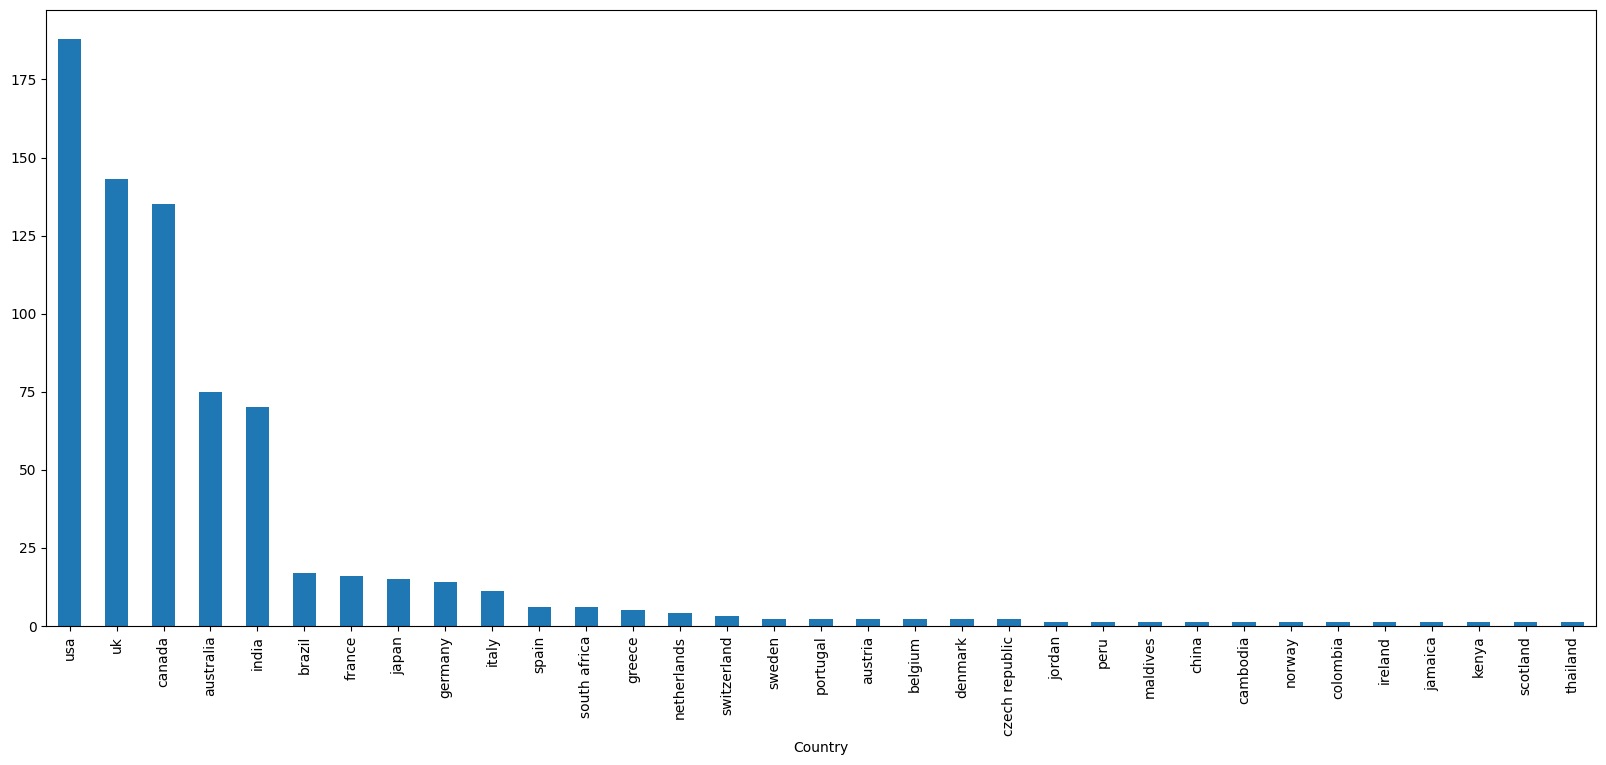

In [23]:
plt.figure(figsize=(20,8))
sentiment_df['Country'].value_counts().plot(kind='bar')

In [24]:
country_count = sentiment_df['Country'].value_counts()

total_count = country_count[country_count < 20].sum()
print(f"Total rows for countries with count < 20: {total_count}")

Total rows for countries with count < 20: 121


In [25]:
less_count_countries = country_count[country_count < 20].index
sentiment_df['Country'] = sentiment_df['Country'].apply(lambda x: 'other' if x in less_count_countries else x)

<Axes: xlabel='Country'>

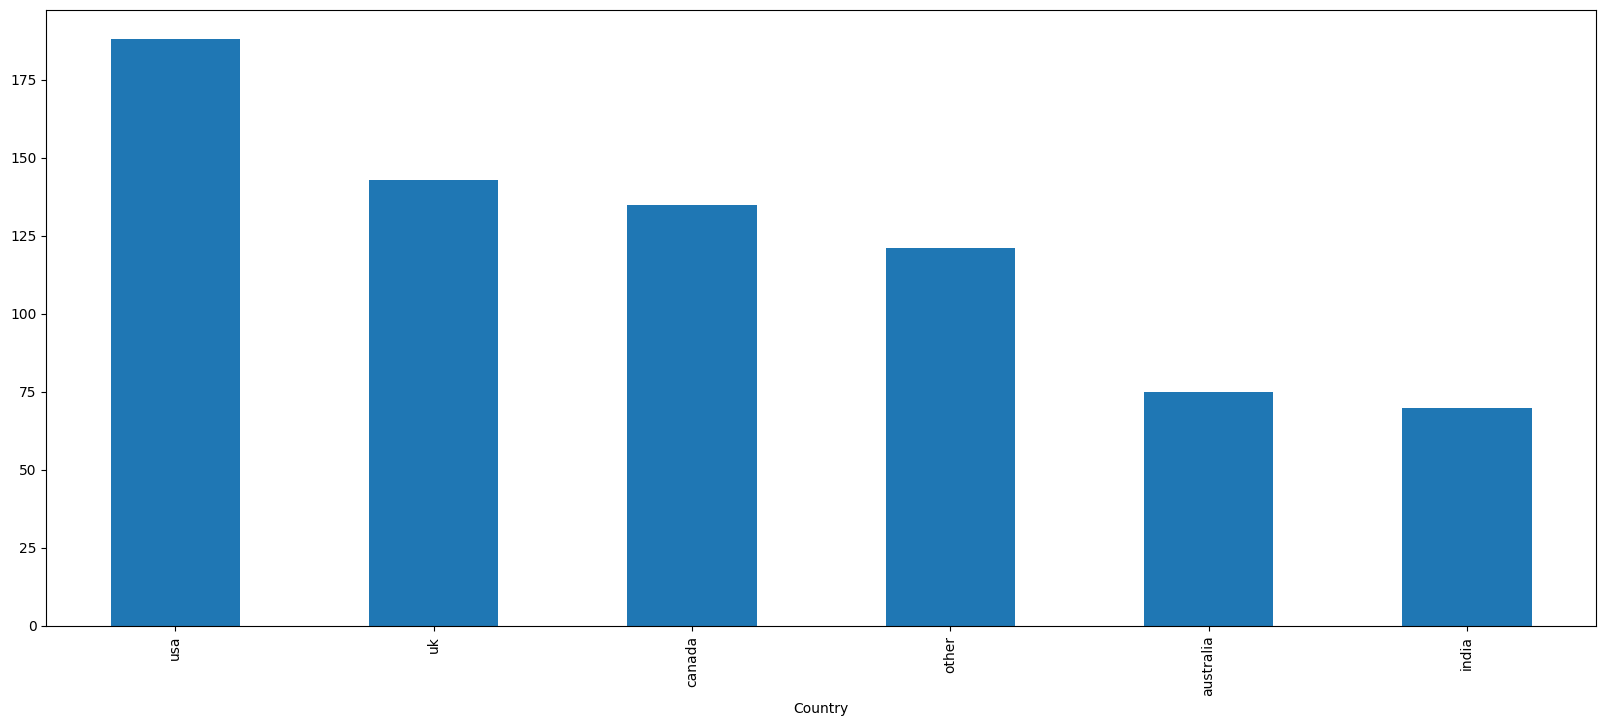

In [26]:
plt.figure(figsize=(20,8))
sentiment_df['Country'].value_counts().plot(kind='bar')

In [27]:
sentiment_df['Country'].value_counts()

Country
usa          188
uk           143
canada       135
other        121
australia     75
india         70
Name: count, dtype: int64

In [28]:
sentiment_df.head()

,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Country,Text
0,positive,2023-01-15 12:30:00,twitter,"nature,park",15,30,usa,enjoy beauti day park
1,negative,2023-01-15 08:45:00,twitter,"traffic,morning",5,10,canada,traffic terribl morn
2,positive,2023-01-15 15:45:00,instagram,"fitness,workout",20,40,usa,finish amaz workout
3,positive,2023-01-15 18:20:00,facebook,"travel,adventure",8,15,uk,excit upcom weekend getaway
4,neutral,2023-01-15 19:55:00,instagram,"cooking,food",12,25,australia,tri new recip dinner tonight


In [29]:
for val in sentiment_df.columns:
    print(val,"has",sentiment_df[val].nunique(),'unique values')

Sentiment has 191 unique values
Timestamp has 683 unique values
Platform has 3 unique values
Hashtags has 692 unique values
Retweets has 26 unique values
Likes has 38 unique values
Country has 6 unique values
Text has 705 unique values


<Axes: xlabel='Sentiment'>

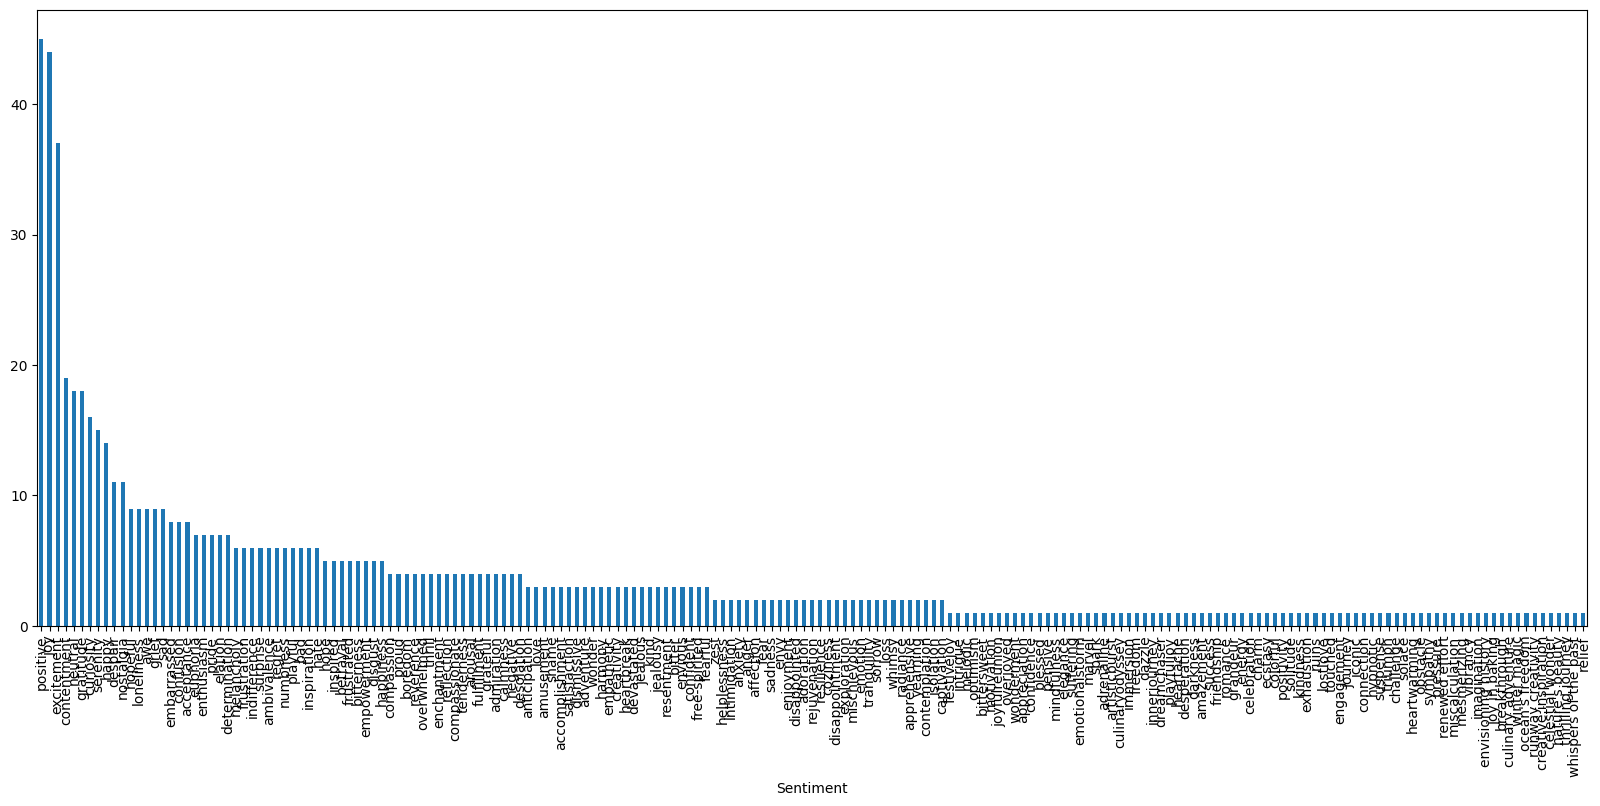

In [30]:
plt.figure(figsize=(20,8))
sentiment_df['Sentiment'].value_counts().plot(kind='bar')

In [31]:
very_positive = [
'Love', 'Enjoyment', 'Adoration', 'Love', 'Enjoyment', 'Adoration', 'Elation', 'Euphoria', 'Elation', 'Euphoria', 'Elation', 'Elation',
'Euphoria', 'Elation', 'Euphoria', 'Elation', 'Zest', 'Zest', 'Overjoyed', 'Blessed', 'Elation', 'DreamChaser', 'Radiance', 'Rejuvenation',
'Euphoria', 'FestiveJoy', 'Dazzle', 'Adrenaline', 'Radiance', 'Rejuvenation', 'Euphoria', 'Spark', 'Marvel', 'Love', 'Success', 'Amazement',
'Grandeur', 'Ecstasy', 'Connection', 'Iconic', 'Euphoria', 'Triumph', 'Heartwarming'
]

positive = [
    'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
    'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
    'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
    'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Happiness', 'Joy', 'Amusement', 'Admiration',
    'Affection', 'Awe', 'Anticipation', 'Calmness', 'Excitement', 'Kind', 'Pride', 'Happiness', 'Joy', 'Amusement', 'Admiration', 'Affection', 'Awe', 'Anticipation', 'Calmness', 'Excitement', 'Kind', 'Pride', 'Excitement', 'Calmness', 'Excitement', 'Kind', 'Pride', 'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Determination', 'Serenity', 'Determination', 'Serenity', 'Determination', 'Serenity', 'Determination', 'Serenity', 'Determination', 'Serenity', 'Contentment', 'Hopeful', 'Proud', 'Grateful', 'Compassionate', 'Free-spirited', 'Inspired', 'Hopeful', 'Confident', 'Serenity', 'Grateful', 'Compassionate', 'Proud', 'Hopeful', 'Inspired', 'Contentment', 'Free-spirited', 'Grateful', 'Confident', 'Hopeful', 'Inspired', 'Hopeful', 'Compassionate', 'Proud', 'Hopeful', 'Inspired', 'Contentment', 'Free-spirited', 'Grateful', 'Confident', 'Hopeful', 'Inspired', 'Hopeful', 'Compassionate', 'Proud', 'Hopeful', 'Awe', 'Determination', 'Thrill', 'Calmness', 'Excitement', 'Gratitude', 'Admiration', 'Inspiration', 'Motivation', 'Gratitude', 'Empowerment', 'Amusement', 'JoyfulReunion', 'Excitement', 'Satisfaction', 'Serenity', 'Anticipation', 'Appreciation', 'Confidence', 'Contentment', 'Enthusiasm', 'Accomplishment', 'Wonderment', 'Optimism', 'Pride', 'Happiness', 'PlayfulJoy', 'Mindfulness', 'Elegance', 'Whimsy', 'Thrill', 'Harmony', 'Creativity', 'Inspiration', 'Coziness', 'Gratitude', 'Adventure', 'Awe', 'Melodic', 'InnerJourney', 'Freedom', 'Whimsy', 'Harmony', 'ArtisticBurst', 'Inspiration', 'Coziness', 'Gratitude', 'CulinaryOdyssey', 'Awe', 'Excitement', 'Contentment', 'Immersion', 'Gratitude', 'Serenity', 'Joy', 'Happiness', 'Contentment', 'Enthusiasm', 'Gratitude', 'Accomplishment', 'Positivity', 'Joy', 'Kindness', 'Friendship', 'Joy', 'Excitement', 'Gratitude', 'Inspiration', 'Happiness', 'Thrill', 'Excitement', 'Joy', 'Exploration', 'Awe', 'Serenity', 'Romance', 'Awe', 'Excitement', 'Captivation', 'Serenity', 'Awe', 'Accomplishment', 'Exploration', 'Adventure', 'Tranquility', 'Energy', 'Serenity', 'Joy', 'Celebration', 'Hope', 'Enthusiasm', 'Creativity', 'Colorful', 'Pride', 'Hypnotic', 'Excitement', 'Pride', 'Touched', 'Gratitude', 'Inspiration', 'Satisfaction', 'Joy', 'Inspiration', 'Excitement', 'Admiration', 'Captivation', 'Awe', 'Thrill', 'Determination', 'Renewed Effort', 'Tranquility', 'Adventure', 'Creativity', 'Breakthrough', 'Harmony', 'Joy in Baking', 'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic', 'Thrilling Journey', "Nature's Beauty",
    'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity', 'Excitement', 'Joy', 'Satisfaction', 'Joy', 'Excitement', 'Joy', 'Excitement', 'Joy', 'Pride', 'Excitement', 'Joy', 'Joy', 'Excitement', 'Contentment', 'Gratitude', 'Contentment', 'Joy', 'Joy', 'Contentment', 'Joy', 'Joy', 'Contentment', 'Contentment', 'Contentment', 'Joy', 'Gratitude', 'Contentment', 'Joy', 'Joy', 'Gratitude', 'Excitement', 'Joy', 'Joy', 'Contentment', 'Joy', 'Joy', 'Joy', 'Contentment', 'Joy', 'Excitement', 'Gratitude', 'Excitement', 'Joy', 'Joy', 'Joy', 'Gratitude', 'Joy', 'Gratitude', 'Excitement', 'Excitement', 'Excitement', 'Joy', 'Excitement', 'Positive', 'Excitement', 'Joy', 'Joy', 'Joy', 'Excitement', 'Excitement', 'Joy', 'Excitement', 'Excitement', 'Joy', 'Excitement', 'Excitement', 'Joy', 'Joy', 'Excitement', 'Joy', 'Excitement', 'Joy', 'Excitement', 'Joy', 'Excitement', 'Joy', 'Excitement', 'Joy', 'Excitement', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy'
]

neutral = [
    'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Surprise', 'Acceptance', 'Confusion', 'Surprise', 'Acceptance', 'Confusion', 'Acceptance', 'Confusion', 'Curiosity', 'Indifference', 'Confusion', 'Numbness', 'Nostalgia', 'Ambivalence', 'Acceptance', 'Curiosity', 'Indifference', 'Confusion', 'Numbness', 'Nostalgia', 'Ambivalence', 'Acceptance', 'Curiosity', 'Indifference', 'Confusion', 'Numbness', 'Nostalgia', 'Ambivalence', 'Acceptance', 'Indifference', 'Confusion', 'Numbness', 'Nostalgia', 'Ambivalence', 'Acceptance', 'Curiosity', 'Indifference', 'Confusion', 'Numbness', 'Nostalgia', 'Ambivalence', 'Acceptance', 'Curiosity', 'Numbness', 'Empathetic', 'Playful', 'Curiosity', 'Ambivalence', 'Playful', 'Empathetic', 'Playful', 'Playful', 'Empathetic', 'Playful', 'Playful', 'Nostalgia', 'Curiosity', 'Contemplation', 'Reflection', 'Nostalgia', 'Surprise', 'Curiosity', 'Enchantment', 'Pensive', 'Wonder', 'Enchantment', 'Reflection', 'Wonder', 'Curiosity', 'Resilience', 'Nostalgia', 'Resilience', 'Nostalgia', 'Solitude', 'Surprise', 'Curiosity', 'Reflection', 'Enchantment', 'Wonder', 'Emotion', 'Enchantment', 'Nostalgia', 'Charm', 'Emotion', 'Journey', 'Nostalgia', 'Engagement', 'Contemplation', 'Suspense', 'Reflection', 'Sympathy', 'Solace', 'Envisioning History', "Ocean's Freedom", 'Surprise', 'Indifference', 'Surprise', 'Curiosity', 'Curiosity', 'Curiosity', 'Curiosity', 'Curiosity', 'Curiosity', 'Relief', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral'
]

negative = [
    'Negative', 'Negative', 'Negative', 'Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Shame', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Shame', 'Bitter', 'Shame', 'Loneliness', 'Resentment', 'Frustration', 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Disgust', 'Loneliness', 'Resentment', 'Frustration', 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Disgust', 'Loneliness', 'Resentment', 'Frustration', 'Boredom', 'Melancholy', 'Melancholy', 'Melancholy', 'Melancholy', 'Melancholy', 'Bitterness', 'Loneliness', 'Yearning', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Frustrated', 'Envious', 'Dismissive', 'Frustrated', 'Loneliness', 'Fearful', 'Bitterness', 'Overwhelmed', 'Frustrated', 'Envious', 'Dismissive', 'Bitterness', 'Loneliness', 'Yearning', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Frustrated', 'Envious', 'Dismissive', 'Frustrated', 'Loneliness', 'Overwhelmed', 'Intrigue', 'Loneliness', 'Regret', 'Isolation', 'Disappointment', 'Melancholy', 'Bitterness', 'Regret', 'Loneliness', 'Bitterness', 'Isolation', 'Regret', 'Regret', 'Disappointment', 'Frustration', 'Obstacle', 'Pressure', 'Miscalculation', 'Challenge', 'Boredom', 'Frustration', 'Disgust', 'Frustration', 'Embarrassed', 'Embarrassed', 'Embarrassed', 'Embarrassed', 'Embarrassed', 'Embarrassed', 'Embarrassed', 'Embarrassed', 'Sad', 'Bad', 'Sad', 'Bad', 'Sad', 'Sad', 'Bad', 'Sad', 'Bad', 'Sad', 'Sad', 'Bad', 'Sad', 'Bad', 'Sad'
]

very_negative = ['Despair', 'Grief', 'Jealousy', 'Despair', 'Grief', 'Jealousy', 'Despair', 'Grief', 'Jealousy', 'Despair', 'Jealous', 'Devastated', 'Jealous', 'Devastated', 'Despair', 'Jealous', 'Devastated', 'Bittersweet', 'Heartbreak', 'Grief', 'Despair', 'Betrayal', 'Suffering', 'EmotionalStorm', 'Grief', 'LostLove', 'Despair', 'Exhaustion', 'Sorrow', 'Darkness', 'Desperation', 'Ruins', 'Desolation', 'Grief', 'Desolation', 'Heartbreak', 'Grief', 'Betrayal', 'Despair', 'Sorrow', 'Desolation', 'Grief', 'Betrayal', 'Heartbreak', 'Despair', 'Loss', 'Heartache', 'Grief', 'Betrayal', 'Despair', 'Desolation', 'Loss', 'Betrayal', 'Despair', 'Whispers of the Past', 'Mischievous', 'Mischievous', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate']

In [32]:
very_positive = list(set(very_positive))
positive = list(set(positive))
neutral = list(set(neutral))
negative = list(set(negative))
very_negative = list(set(very_negative))


In [33]:
very_positive = pd.Series(very_positive)
positive = pd.Series(positive)
neutral = pd.Series(neutral)
negative = pd.Series(negative)
very_negative = pd.Series(very_negative)

In [34]:
print(len(very_positive.unique()))
print(len(positive.unique()))
print(len(neutral.unique()))
print(len(negative.unique()))
print(len(very_negative.unique()))


24
81
28
36
22


In [35]:
very_positive = [x.lower() for x in very_positive]
positive = [x.lower() for x in positive]
neutral = [x.lower() for x in neutral]
negative = [x.lower() for x in negative]
very_negative = [x.lower() for x in very_negative]

def map_sentiment(s):
    s = str(s).lower().strip() 
    if s in very_positive:
        return 'Very Positive'
    elif s in positive:
        return 'Positive'
    elif s in neutral:
        return 'Neutral'
    elif s in negative:
        return 'Negative'
    elif s in very_negative:
        return 'Very Negative'
    else:
        return 'Neutral'

In [36]:
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].apply(map_sentiment) 

<Axes: xlabel='Sentiment'>

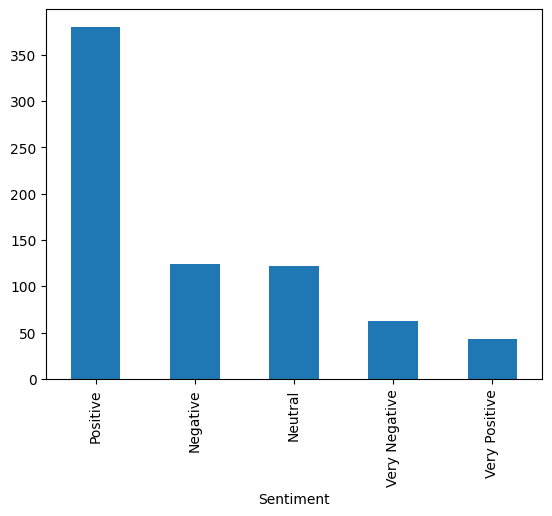

In [37]:
sentiment_df['Sentiment'].value_counts().plot(kind='bar')

In [38]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sentiment  732 non-null    object        
 1   Timestamp  732 non-null    datetime64[ns]
 2   Platform   732 non-null    object        
 3   Hashtags   732 non-null    object        
 4   Retweets   732 non-null    int64         
 5   Likes      732 non-null    int64         
 6   Country    732 non-null    object        
 7   Text       732 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 45.9+ KB


In [39]:
for val in sentiment_df.columns:
    print(val,"has",sentiment_df[val].nunique(),'unique values')

Sentiment has 5 unique values
Timestamp has 683 unique values
Platform has 3 unique values
Hashtags has 692 unique values
Retweets has 26 unique values
Likes has 38 unique values
Country has 6 unique values
Text has 705 unique values


<Axes: xlabel='Platform', ylabel='count'>

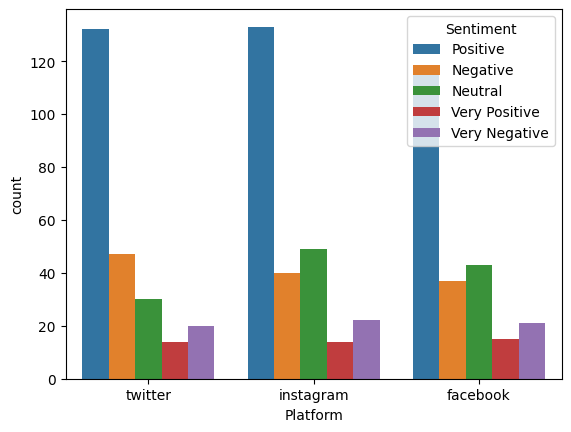

In [40]:
sns.countplot(x='Platform', hue='Sentiment', data=sentiment_df)

<Axes: xlabel='Country', ylabel='count'>

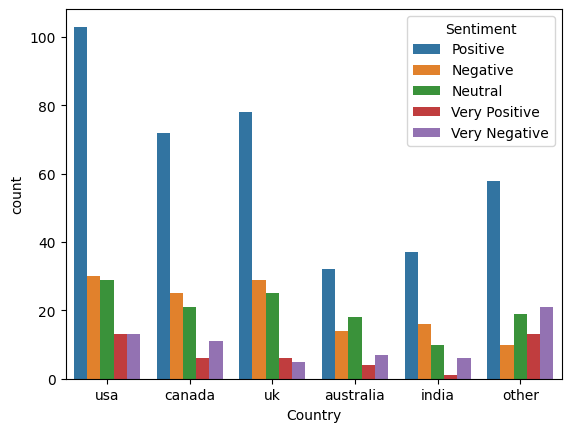

In [41]:
sns.countplot(x='Country', hue='Sentiment', data=sentiment_df)

In [42]:
sentiment_df.head()

,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Country,Text
0,Positive,2023-01-15 12:30:00,twitter,"nature,park",15,30,usa,enjoy beauti day park
1,Negative,2023-01-15 08:45:00,twitter,"traffic,morning",5,10,canada,traffic terribl morn
2,Positive,2023-01-15 15:45:00,instagram,"fitness,workout",20,40,usa,finish amaz workout
3,Positive,2023-01-15 18:20:00,facebook,"travel,adventure",8,15,uk,excit upcom weekend getaway
4,Neutral,2023-01-15 19:55:00,instagram,"cooking,food",12,25,australia,tri new recip dinner tonight


In [43]:
from sklearn.model_selection import train_test_split

X = sentiment_df['Text']
y = sentiment_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(max_features=600)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log = LogisticRegression(
    class_weight='balanced',
    multi_class='multinomial',
    random_state=42
)

log.fit(X_train_tfidf, y_train_enc)
y_pred_log = log.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_enc, y_pred_log)

print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test_enc, y_pred_log)
print("Confusion Matrix:\n", cm)

print(classification_report(y_test_enc, y_pred_log, target_names=le.classes_))


Accuracy: 0.7211
Confusion Matrix:
 [[16  1  5  3  0]
 [ 1 13  9  0  1]
 [ 2  6 62  0  6]
 [ 0  0  3 10  0]
 [ 0  0  4  0  5]]
               precision    recall  f1-score   support

     Negative       0.84      0.64      0.73        25
      Neutral       0.65      0.54      0.59        24
     Positive       0.75      0.82      0.78        76
Very Negative       0.77      0.77      0.77        13
Very Positive       0.42      0.56      0.48         9

     accuracy                           0.72       147
    macro avg       0.68      0.66      0.67       147
 weighted avg       0.73      0.72      0.72       147



c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train_tfidf, y_train_enc)

y_pred_rf = rf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_enc, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.4f}")

print(classification_report(y_test_enc, y_pred_rf, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred_rf)
print("Confusion Matrix:\n", cm)

Random Forest Accuracy: 0.7347
               precision    recall  f1-score   support

     Negative       0.54      0.80      0.65        25
      Neutral       0.90      0.38      0.53        24
     Positive       0.77      0.88      0.82        76
Very Negative       0.90      0.69      0.78        13
Very Positive       1.00      0.33      0.50         9

     accuracy                           0.73       147
    macro avg       0.82      0.62      0.66       147
 weighted avg       0.78      0.73      0.72       147

Confusion Matrix:
 [[20  0  4  1  0]
 [ 4  9 11  0  0]
 [ 9  0 67  0  0]
 [ 2  0  2  9  0]
 [ 2  1  3  0  3]]
